# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [8]:
file1 = 'data1.pkl'
pd.read_p

In [9]:
data = pd.read_csv('processing.csv')
data.head()

,Unnamed: 0,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,day,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday_name,waiting_time_MA7,ride_rate,season
0,6,2015-01-07,410,4085,3676,24.7,2230,8646,2,7,...,-0.2,-9.2,0.0,62.0,27.0,10.09,none,23.657143,0.899878,4
1,7,2015-01-08,419,4030,3728,21.2,2231,8683,3,8,...,3.2,-6.8,0.0,78.0,38.0,8.74,none,23.371429,0.925062,4
2,8,2015-01-09,424,4167,3813,21.8,2215,8506,4,9,...,4.3,-5.5,0.0,81.0,33.0,9.41,none,24.028571,0.915047,4
3,9,2015-01-10,215,1916,1645,41.2,2447,11123,5,10,...,2.3,-4.0,0.0,83.0,39.0,9.60,none,26.171429,0.858559,4
4,10,2015-01-11,187,1700,1572,28.8,2419,10806,6,11,...,3.4,-7.2,0.0,51.0,23.0,10.05,none,26.785714,0.924706,4


In [10]:
data_copy = data.copy()

In [11]:
data_copy.drop('Unnamed: 0', axis=1, inplace=True)

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [12]:
# 숫자형 변수 분석
def func_numeric(var, df):
    data = df
    
    print(f'====current variable is {var}====')
    print()
    print('평균 : ', data[var].mean())
    print()
    print('====기초통계량====')
    display(data[var].describe())
    print()
    
    print('====히스토그램 & 커널 밀도 함수====')
    sns.histplot(x=var, data=data, kde=True)
    plt.grid()
    plt.show()
    
    print('====박스플롯====')
    plt.boxplot(data[var], vert=False)
    plt.grid()
    plt.show()


In [13]:
# 범주형 변수 분석
def func_categoric(var, df):
    data = df
    
    print()
    print('====범주별 개수 확인====')
    print(data[var].value_counts())
    print()
    print('====범주별 비율 확인====')
    print(data[var].value_counts(normalize=True))
    
    print()
    print('====바 차트====')
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

====current variable is car_cnt====

평균 :  418.9190672153635

====기초통계량====


count    2916.000000
mean      418.919067
std       133.719577
min       132.000000
25%       278.000000
50%       455.000000
75%       522.000000
max      1413.000000
Name: car_cnt, dtype: float64


====히스토그램 & 커널 밀도 함수====


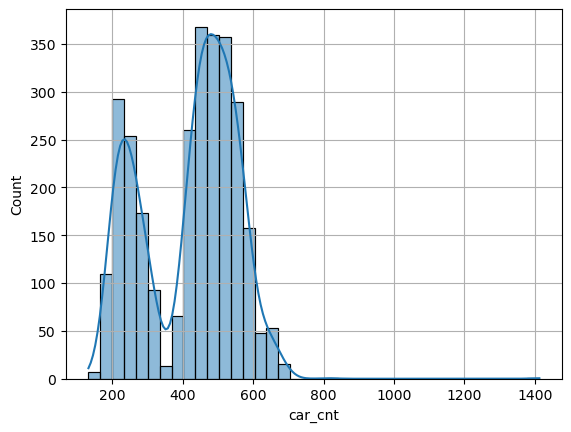

====박스플롯====


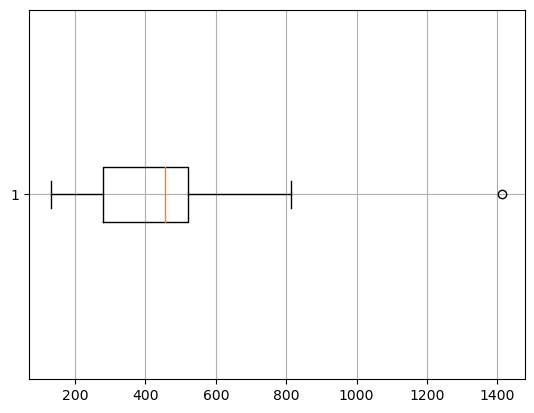

**************************************************
====current variable is request_cnt====

평균 :  3928.127229080933

====기초통계량====


count    2916.000000
mean     3928.127229
std      1509.300543
min       527.000000
25%      2163.500000
50%      4722.500000
75%      5110.000000
max      6182.000000
Name: request_cnt, dtype: float64


====히스토그램 & 커널 밀도 함수====


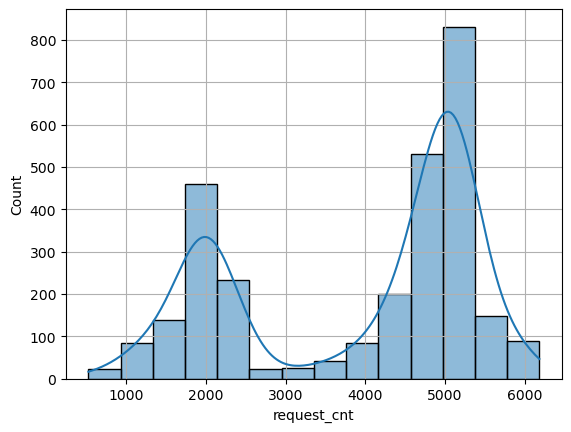

====박스플롯====


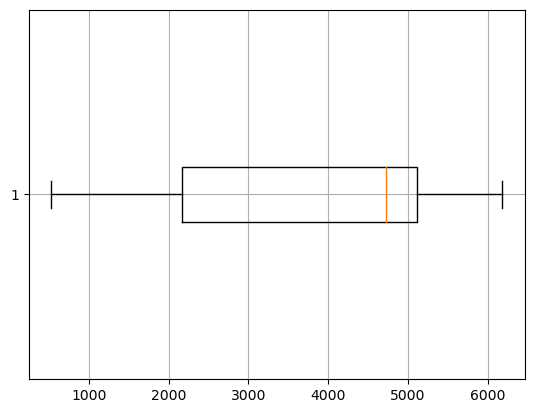

**************************************************
====current variable is ride_cnt====

평균 :  3285.638545953361

====기초통계량====


count    2916.000000
mean     3285.638546
std      1248.972391
min       462.000000
25%      1779.000000
50%      3935.000000
75%      4241.250000
max      5189.000000
Name: ride_cnt, dtype: float64


====히스토그램 & 커널 밀도 함수====


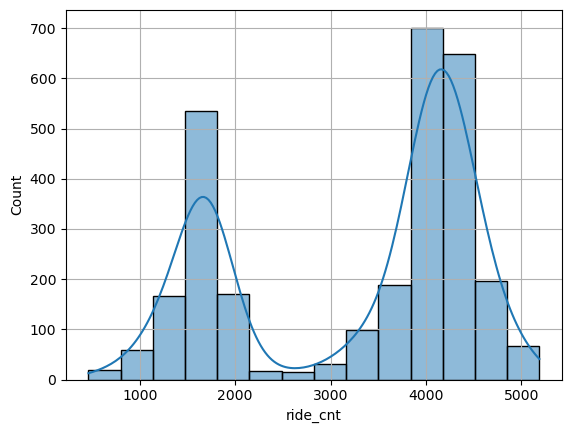

====박스플롯====


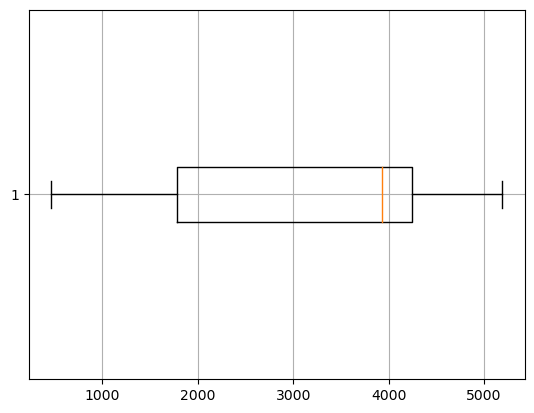

**************************************************
====current variable is waiting_time====

평균 :  40.33703703703699

====기초통계량====


count    2916.000000
mean       40.337037
std        14.094318
min        17.600000
25%        29.700000
50%        38.250000
75%        48.700000
max        96.100000
Name: waiting_time, dtype: float64


====히스토그램 & 커널 밀도 함수====


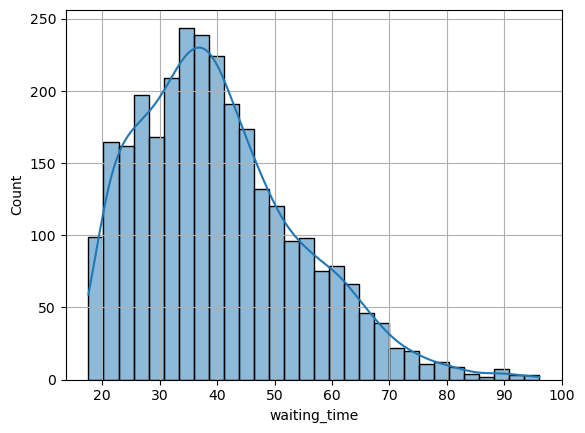

====박스플롯====


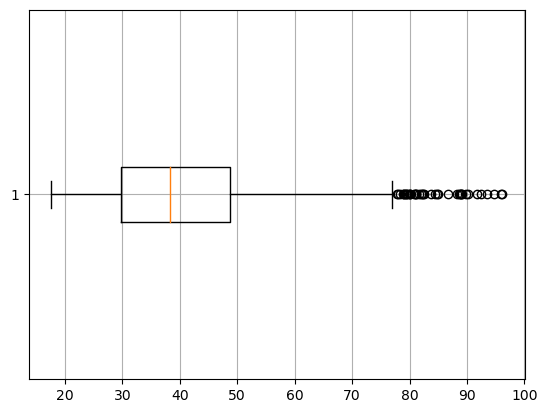

**************************************************
====current variable is fare====

평균 :  2304.340534979424

====기초통계량====


count    2916.000000
mean     2304.340535
std       107.382826
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: fare, dtype: float64


====히스토그램 & 커널 밀도 함수====


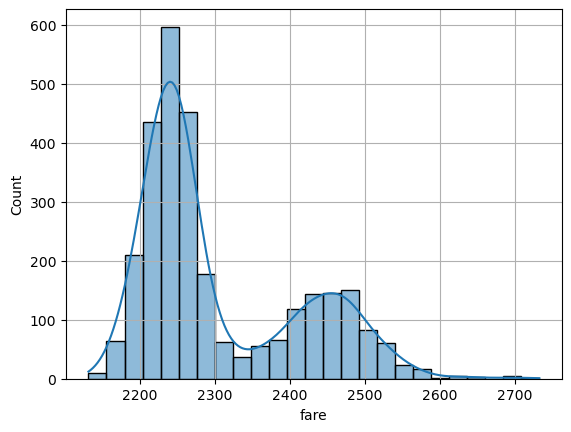

====박스플롯====


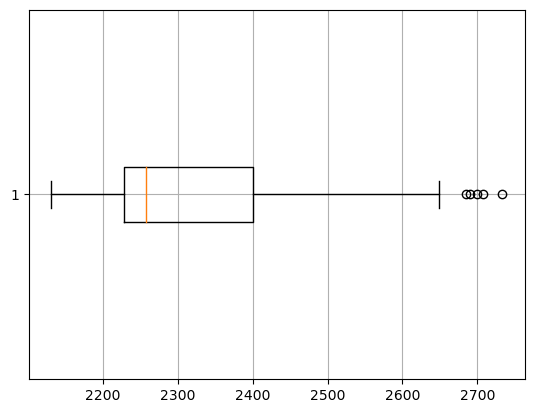

**************************************************
====current variable is distance====

평균 :  9253.533264746227

====기초통계량====


count     2916.000000
mean      9253.533265
std       1020.053563
min       7672.000000
25%       8519.000000
50%       8821.500000
75%      10151.000000
max      14136.000000
Name: distance, dtype: float64


====히스토그램 & 커널 밀도 함수====


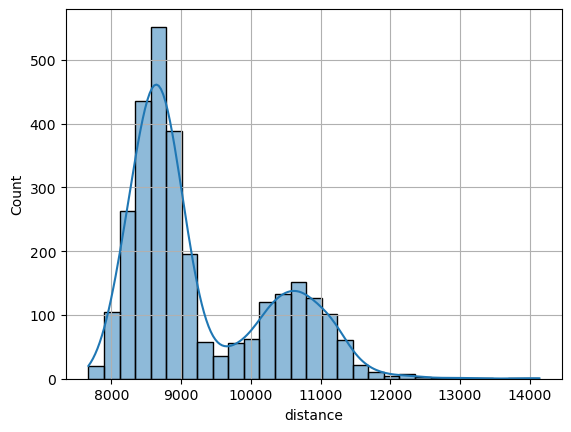

====박스플롯====


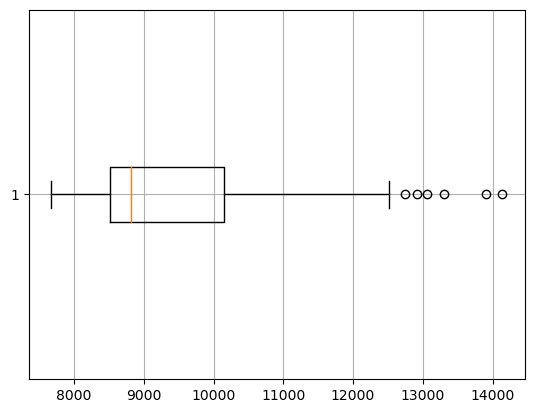

**************************************************
====current variable is target====

평균 :  40.34026063100133

====기초통계량====


count    2916.000000
mean       40.340261
std        14.091722
min        17.600000
25%        29.700000
50%        38.250000
75%        48.700000
max        96.100000
Name: target, dtype: float64


====히스토그램 & 커널 밀도 함수====


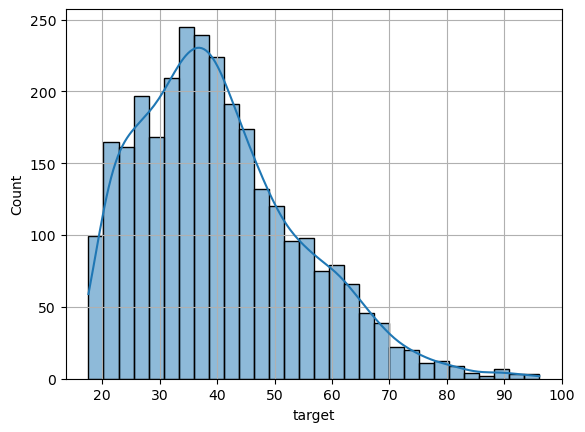

====박스플롯====


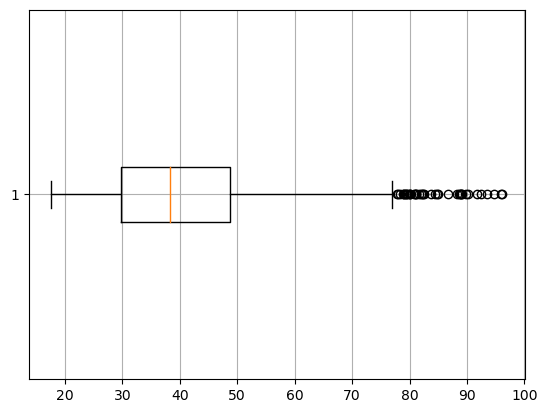

**************************************************
====current variable is temp_max====

평균 :  18.109979423868296

====기초통계량====


count    2916.000000
mean       18.109979
std        10.693802
min       -11.200000
25%         9.100000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64


====히스토그램 & 커널 밀도 함수====


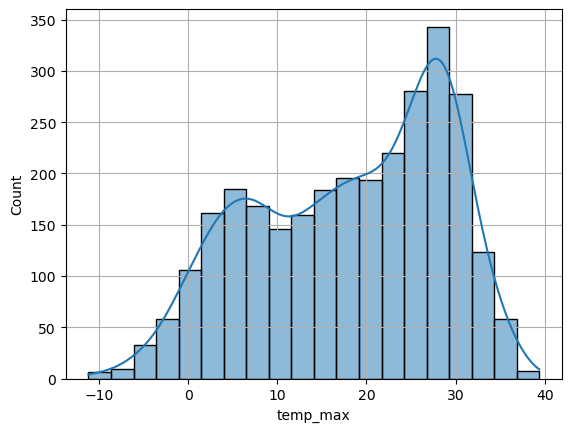

====박스플롯====


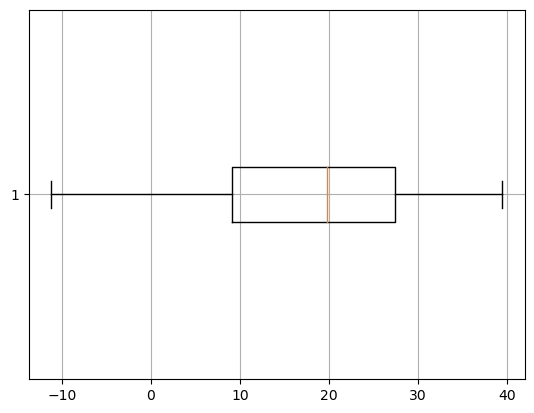

**************************************************
====current variable is temp_min====

평균 :  9.446433470507538

====기초통계량====


count    2916.000000
mean        9.446433
std        10.770206
min       -18.500000
25%         0.600000
50%        10.100000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64


====히스토그램 & 커널 밀도 함수====


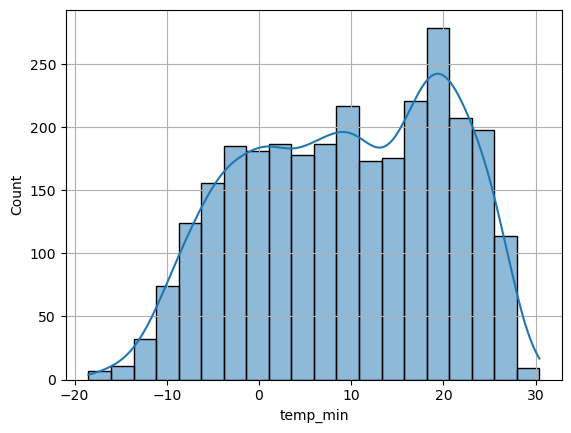

====박스플롯====


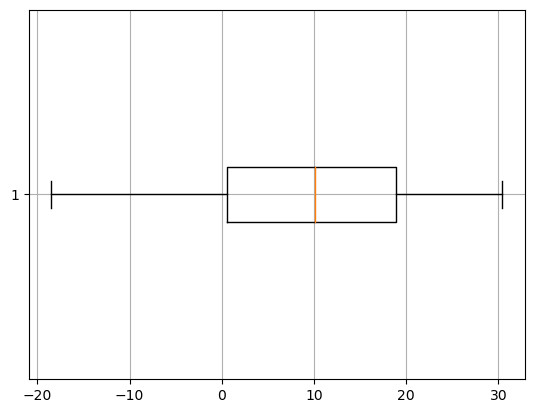

**************************************************
====current variable is rain(mm)====

평균 :  3.3613511659807966

====기초통계량====


count    2916.000000
mean        3.361351
std        12.607993
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64


====히스토그램 & 커널 밀도 함수====


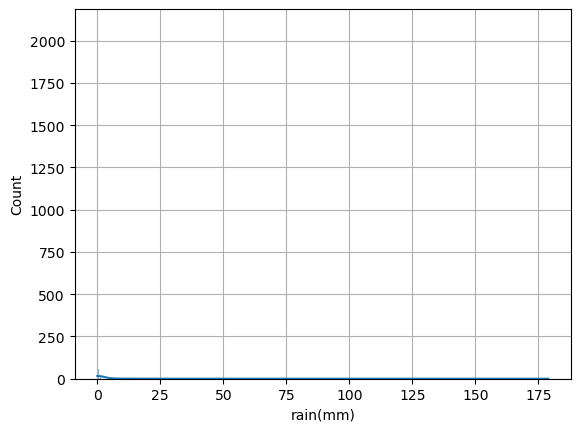

====박스플롯====


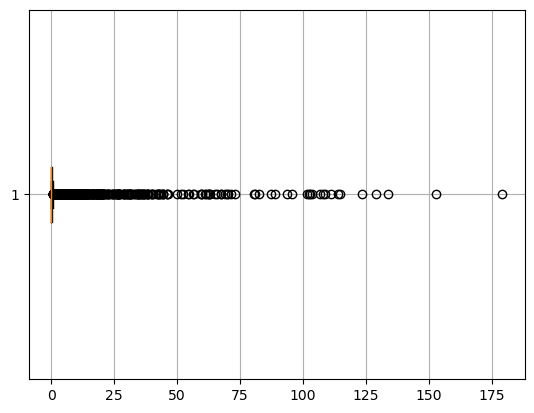

**************************************************
====current variable is humidity_max(%)====

평균 :  79.1042524005487

====기초통계량====


count    2916.000000
mean       79.104252
std        14.009508
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64


====히스토그램 & 커널 밀도 함수====


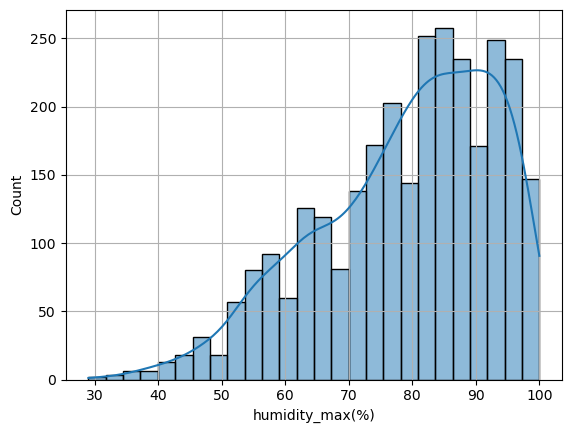

====박스플롯====


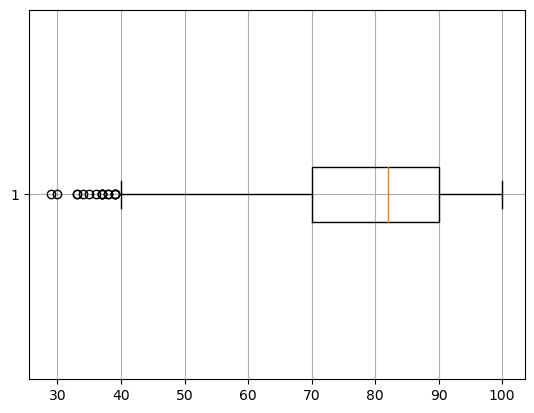

**************************************************
====current variable is humidity_min(%)====

평균 :  41.123045267489715

====기초통계량====


count    2916.000000
mean       41.123045
std        16.405522
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64


====히스토그램 & 커널 밀도 함수====


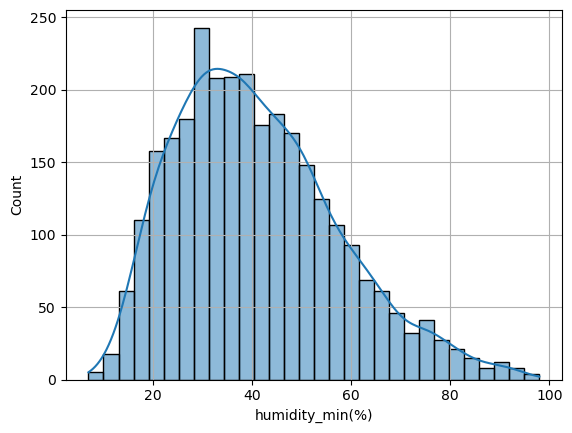

====박스플롯====


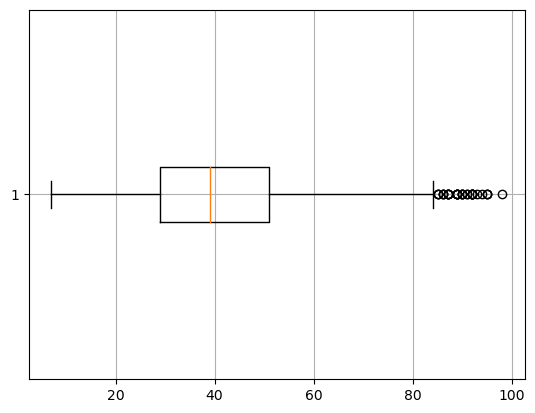

**************************************************
====current variable is sunshine(MJ/m2)====

평균 :  13.507054183813418

====기초통계량====


count    2916.000000
mean       13.507054
std         6.942859
min         0.000000
25%         8.247500
50%        12.700000
75%        18.602500
max        30.790000
Name: sunshine(MJ/m2), dtype: float64


====히스토그램 & 커널 밀도 함수====


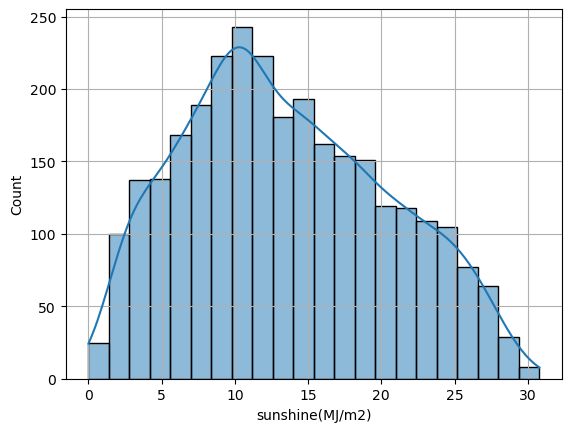

====박스플롯====


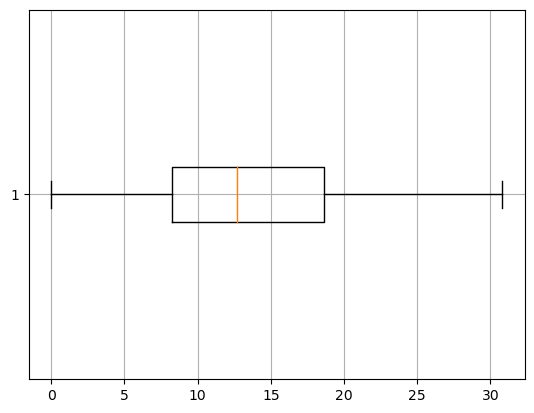

**************************************************
====current variable is waiting_time_MA7====

평균 :  40.31670585929855

====기초통계량====


count    2916.000000
mean       40.316706
std        12.032292
min        18.800000
25%        31.296429
50%        39.042857
75%        47.007143
max        83.928571
Name: waiting_time_MA7, dtype: float64


====히스토그램 & 커널 밀도 함수====


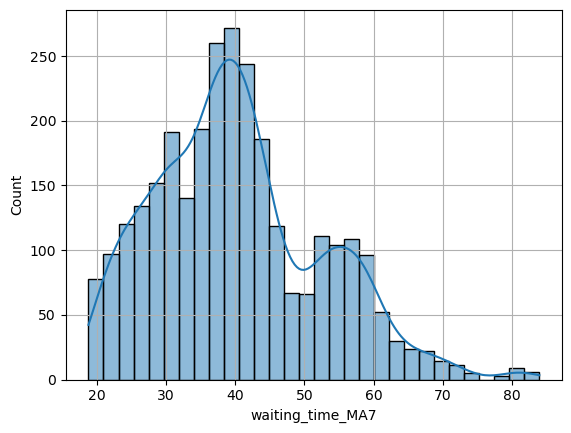

====박스플롯====


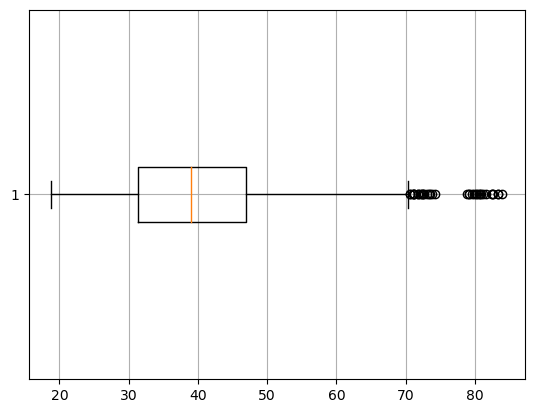

**************************************************
====current variable is ride_rate====

평균 :  0.8414350504271689

====기초통계량====


count    2916.000000
mean        0.841435
std         0.052143
min         0.596996
25%         0.805897
50%         0.845545
75%         0.877657
max         0.968844
Name: ride_rate, dtype: float64


====히스토그램 & 커널 밀도 함수====


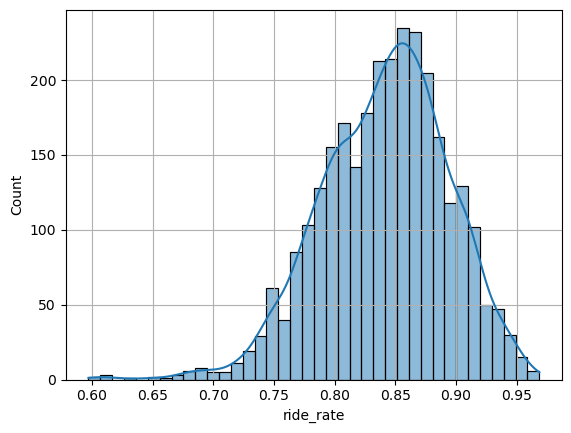

====박스플롯====


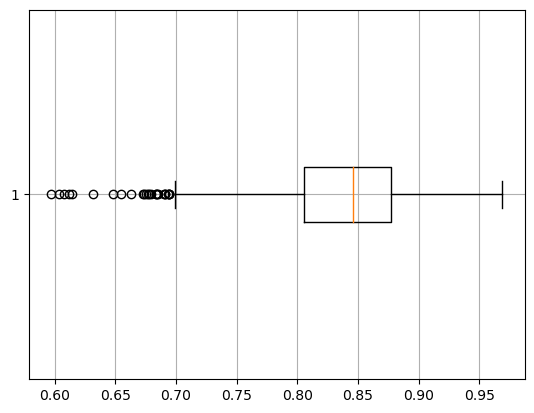

**************************************************


In [14]:
columns = ['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare', 'distance', 'target', 
           'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 
           'waiting_time_MA7', 'ride_rate']

for e in columns:
    func_numeric(e, data_copy)
    print('*' * 50)

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 산점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [15]:
target = 'target'

#### 1) 전체 상관계수 시각화

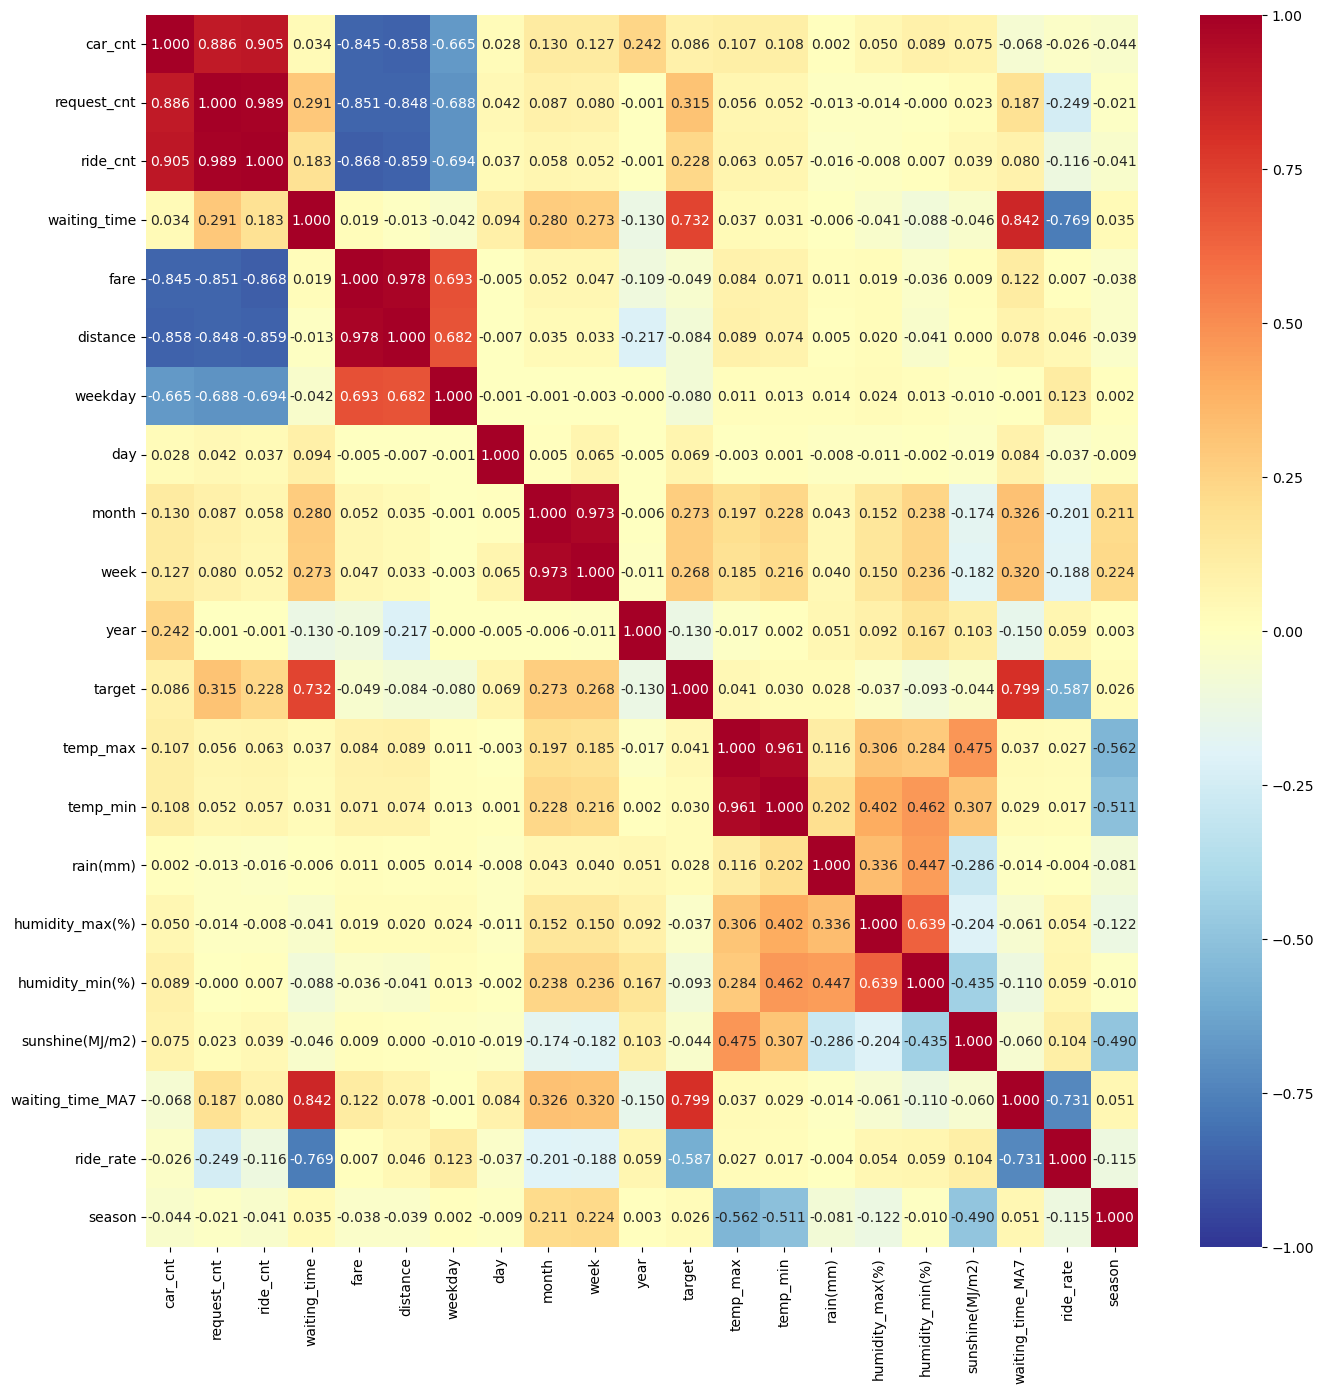

In [16]:
plt.figure(figsize = (16, 16))
sns.heatmap(data_copy.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [17]:
def func_corr(var, target, df):
    data = df
    
    print('====피어슨 상관계수 & p-value====')
    print(spst.pearsonr(data[var], data[target]))
    
    print()
    print('====히스토그램 & 회귀선====')
    sns.regplot(x=var, y=target, data = data)
    plt.grid()
    plt.show()

In [18]:
print('====피어슨 상관계수 & p-value====')
print(spst.pearsonr(data_copy.loc[data_copy['car_cnt'] < 455, 'car_cnt'], data_copy.loc[data_copy['car_cnt'] < 455, target]))
print(spst.pearsonr(data_copy.loc[data_copy['car_cnt'] >= 455, 'car_cnt'], data_copy.loc[data_copy['car_cnt'] >= 455, target]))

====피어슨 상관계수 & p-value====
(0.07888141140048574, 0.002586210359594116)
(-0.14725450966327563, 1.5982483375814188e-08)


#### 2) 산점도

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [19]:
def func_t_test(var, target, data1, data2, df):
    data = df
    temp = data.loc[data[target].notnull()]

    # 두 그룹으로 데이터 저장
    group1 = temp.loc[temp[var] == data1, target]
    group2 = temp.loc[temp[var] == data2, target]

    print('====t-test 결과====')
    print(spst.ttest_ind(group1, group2))

In [20]:
# 주말, 주중에 따른 평균대기시간 확인
# 가설 : 주말과 주중은 평균대기시간에 영향이 있을 것이다.
weekend = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 1,
    7: 1
}

In [21]:
data_copy['weekend'] = data_copy['weekday'].map(weekend)
data_copy['weekend'].value_counts()

0    2500
1     416
Name: weekend, dtype: int64

In [22]:
func_t_test('weekend', target, 0, 1, data_copy)

====t-test 결과====
Ttest_indResult(statistic=1.6664432155122746, pvalue=0.095732641518717)


In [23]:
# 거리에 따른 평균대기시간 확인
# 가설 : 단거리, 장거리 여부는 평균대기시간에 영향이 있을 것이다
data_copy['long_distance'] = np.where(data_copy['distance'] < 10151, 0, 1)
print(data_copy['long_distance'].value_counts())
func_t_test('long_distance', target, 0, 1, data_copy)

0    2187
1     729
Name: long_distance, dtype: int64
====t-test 결과====
Ttest_indResult(statistic=3.3119991168950778, pvalue=0.0009376208866765683)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
# 양
# waiting_time 0.732
# waiting_time_M7 0.799
# 음
# ride_rate -0.587

* 중간(약한) 관계의 변수

In [ ]:
# 양
# request_cnt 0.315
# ride_cnt 0.228
# month 0.273
# week 0.268
# 음


* (거의) 관계가 없는 변수

In [ ]:
# 양
# car_cnt 0.086
# day 0.069
# temp_max 0.041
# temp_min 0.030
# rain(mm) 0.028
# season 0.026
# 음
# fare -0.049
# distance -0.084
# weekday -0.080
# year -0.130
# humidity_max(%) -0.037
# humidity_min(%) -0.093
# sunshine(Mj/m2) -0.044

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [27]:
data_copy

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,day,month,...,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),holiday_name,waiting_time_MA7,ride_rate,season,weekend,long_distance
0,2015-01-07,410,4085,3676,24.7,2230,8646,2,7,1,...,0.0,62.0,27.0,10.09,none,23.657143,0.899878,4,0,0
1,2015-01-08,419,4030,3728,21.2,2231,8683,3,8,1,...,0.0,78.0,38.0,8.74,none,23.371429,0.925062,4,0,0
2,2015-01-09,424,4167,3813,21.8,2215,8506,4,9,1,...,0.0,81.0,33.0,9.41,none,24.028571,0.915047,4,0,0
3,2015-01-10,215,1916,1645,41.2,2447,11123,5,10,1,...,0.0,83.0,39.0,9.60,none,26.171429,0.858559,4,0,1
4,2015-01-11,187,1700,1572,28.8,2419,10806,6,11,1,...,0.0,51.0,23.0,10.05,none,26.785714,0.924706,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2022-12-26,603,5555,4605,39.2,2163,7889,0,26,12,...,0.0,86.0,51.0,10.25,none,43.485714,0.828983,4,0,0
2912,2022-12-27,669,5635,4654,44.4,2198,8178,1,27,12,...,0.1,92.0,40.0,10.86,none,42.771429,0.825909,4,0,0
2913,2022-12-28,607,5654,4648,44.8,2161,7882,2,28,12,...,0.0,71.0,34.0,10.88,none,43.514286,0.822073,4,0,0
2914,2022-12-29,581,5250,4247,52.5,2229,8433,3,29,12,...,0.0,87.0,38.0,10.84,none,42.957143,0.808952,4,0,0


In [32]:
# 양
# waiting_time 0.732
# waiting_time_M7 0.799
# 음
# ride_rate -0.587

# 양
# request_cnt 0.315
# ride_cnt 0.228
# month 0.273
# week 0.268
# 음

data_copy_copy = data_copy.copy()
columns = ['Date', 'waiting_time', 'waiting_time_MA7', 'ride_rate', 'request_cnt', 'ride_cnt', 'month', 'week', 'target']
data_copy_copy = data_copy_copy.loc[:, columns]
data_copy_copy

,Date,waiting_time,waiting_time_MA7,ride_rate,request_cnt,ride_cnt,month,week,target
0,2015-01-07,24.7,23.657143,0.899878,4085,3676,1,2,21.2
1,2015-01-08,21.2,23.371429,0.925062,4030,3728,1,2,21.8
2,2015-01-09,21.8,24.028571,0.915047,4167,3813,1,2,41.2
3,2015-01-10,41.2,26.171429,0.858559,1916,1645,1,2,28.8
4,2015-01-11,28.8,26.785714,0.924706,1700,1572,1,2,23.2
...,...,...,...,...,...,...,...,...,...
2911,2022-12-26,39.2,43.485714,0.828983,5555,4605,12,52,44.4
2912,2022-12-27,44.4,42.771429,0.825909,5635,4654,12,52,44.8
2913,2022-12-28,44.8,43.514286,0.822073,5654,4648,12,52,52.5
2914,2022-12-29,52.5,42.957143,0.808952,5250,4247,12,52,38.3


In [33]:
data_copy_copy.to_csv('final_processing.csv')